<a href="https://colab.research.google.com/github/JuCo168/Vigenere-decipher/blob/main/107hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import string
import math

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


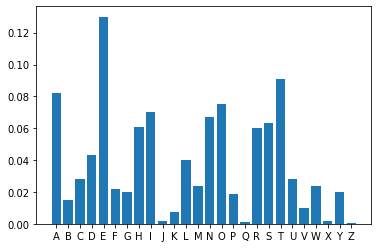

In [ ]:
# cipher text
cipher = ('NBLRFMGYMYNUAGJKGRWPHIGISHTXHHLBQQVHCGZXVBHONVRVAFJYGUIGXTIEPMWTILFRKBJHSZ'
    'RAMAWMVETRGMYADJENBAHEQJZWNBXAWNUCGDTVTAGHQQVFHCBQATSRZNFQENHUGLVZGFINGMVTAGRUKX'
    'FGMHFPBYWMVPXHWHUAWNHWCOEJTHGOFRFWGTASNQLHZFHNWQHSOFFHKNWWNLWWAFJYFWZHSUYAFZRUHC'
    'BQAMFBXNULLYVYQHDXQCJZHVMFBXERJNXHUQRXMNCHBIAMWCHTHVVWMJGLWGNGUXHGMTCFGRAXHILRFW'
    'FRSLPHIGIHLNGMLFTYTXIKIDLVYIMJWHSRZFFHCBQXKTAIGHNKJSYKSZXXGCBQIGIOMFRKBFHCBQIGIG'
    'NEHVZYVYAFGUJFMRFCKNHSGKMWJDUEWUXSHCFRVMMSZERVMQWHRVWYYVYSLOAYOANLVLYQSOHZVWWGRD'
    'VWBSEAREYNFMGKIGIHBRGIFFUYGKIMHOHOHKTZGYQEGMMCMRZPHJLJYRQMAIFAHZTGZYNQLBSGYPXZXX'
    'MMGHULBSMHSXHWHUAGMGHCOEDOXYVYHVMHKGYPXZXSSNJRZDXHICUMOJBNPBJXWHBEHIMXHIBXZVWWNV'
    'FIESONVRVTQWHSUILYFOPWCKJCOELVMJZFRFBNFZJERXXWHSNQLHZFXNWILTOMGRXKTAIGHWNWCPRUIE'
    'QGUSHBRFAYELKTSQCGLHXSGWNUMWJSJYBIUTINCUQOFQSNQLKNUBGOGLTAUABKHRDUALMLMOPREMXSFY'
    'FSWGIWHTWWTROLXHBWJAUAGNHWDLBGCVYGUAGAXWJCPHAMMONCUWMJQNGKMIWWPNFGTSRMRFCKNHSBIB'
    'AJWLPXAMTAYEVBANGBNVOXSSLNWMWUCMVWQOJWHARDTYWIAWPTYVUFEMXSQLHFQTQHIGKMWNUCGDTXHC'
    'HBPGPJHIBFIKJOVBXBMMSMRLUITFNNQBIWWHPLXEJGCAGMXIWNVVWNWCVYLOTYWIAWWNUVIYGKBAWFYL'
    'JXWHCRVQGHZOQLVZYVYELOAYHICUQOFQSJHPTASUYZIRXFYFSMVYSXGKMYZBXNPMGYOFELOAYCZCHWIQ'
    'SNBHVZFUYVQXKNJUGHKHRAOALKTYWIAVZXLOLQOMLXCZGKMFJRCHPWKYSWUQWETUSJKMMMSLVWQLNBMG'
    'DVMRSMFDOXXHYKWAHWCFQIILMWIAHLEJHNRUAVNHCMHVLMOPRWPXWWAUWBHHCGZXVB')

# English alphabet frequency
freq = [
      0.082,  #A
      0.015,  #B
      0.028,  #C
      0.043,  #D
      0.130,  #E
      0.022,  #F
      0.020,  #G
      0.061,  #H
      0.070,  #I
      0.0015, #J
      0.0077, #K
      0.040,  #L
      0.024,  #M
      0.067,  #N
      0.075,  #O
      0.019,  #P
      0.00095,#Q
      0.060,  #R
      0.063,  #S
      0.091,  #T
      0.028,  #U
      0.0098, #V
      0.024,  #W
      0.0015, #X
      0.020,  #Y
      0.00074,#Z
        ]
alphabet = list(string.ascii_uppercase)
print(alphabet)

plt.bar(alphabet, freq, align='center')
plt.xticks(alphabet, alphabet)
plt.show()

In [ ]:
# finds possible key lengths
def findKeyLen(cipher):
    match = False
    pattern = ''
    c = 0

    for idx1, i in enumerate(cipher):
        for idx2, j in enumerate(cipher[idx1 + 1:]):
            if not match and j == i and idx2 < 16:
                match = True
                c += 1
                pattern += i
                continue
            if match and (j == cipher[idx1 + c]):
                pattern += j
                c += 1
                continue
            if match and (j != cipher[idx1 + c]) or idx2 > 16:
                if len(pattern) > 2:
                    print('pattern: ', pattern)
                    print('distance: ', idx2 - len(pattern) + 1)
                match = False
                pattern = ''
                c = 0
                continue
        pattern = ''
        c = 0

In [ ]:
# frequency analysis
def findKey(cipher):
  cBuf = []             # character buffer
  fBuf = np.zeros(26)   # freuqencey buffer
  hBuf = np.zeros(26)   # similarity % buffer
  count = 0.0           # count matches
  key = ''              # key

  for i in range(7):  # key has 7 letters
    cBuf.clear()      # clear the character buffer
    for idx1, j in enumerate(cipher):
      if (idx1 % 7) == i: # get every 7th character
        cBuf.append(j)
    for k in cBuf: # construct frequency table
      fBuf[ord(k) - 65] += 1.0
    fBuf /= len(cBuf)
    for w in range(26): # 26 possible shifts
      count = 0
      for idx2, x in enumerate(fBuf):
        if x == 0:
          continue;
        if math.isclose(freq[idx2], x, rel_tol = 0.8):
          count += 1
      hBuf[w] = count / 26
      fBuf = np.roll(fBuf, -1)
    key += chr(np.argmax(hBuf) + ord('A'))

  print(key)
  return key 
    

In [ ]:
def decrypt(cipher, key):
    m = ''
    i = 0
    for c in cipher:
        asciiC = ord(c)
        asciiK = ord(key[i])
        asciiM = (asciiC - asciiK) % 26
        m += chr(asciiM + 65)
        i = (i + 1) % 7

    print(m)

In [ ]:
findKeyLen(cipher)
print()
key = findKey(cipher)
print()
decrypt(cipher, key)

pattern:  CBQIGI
distance:  14
pattern:  BQIGI
distance:  14
pattern:  QIGI
distance:  14
pattern:  IGI
distance:  14
pattern:  RVM
distance:  7
pattern:  GKI
distance:  14
pattern:  HOH
distance:  2
pattern:  LBS
distance:  15
pattern:  UAG
distance:  14

FOUNDIT

INRECENTYEARSNEWMETHODSOFELECTRONICCOMMUNICATIONHAVETRANSFORMEDOURSOCIETYMOSTVISIBLYBYENABLINGUBIQUITOUSDIGITALCOMMUNICATIONSANDFACILITATINGBROADECOMMERCEASSUCHITISIMPORTANTFOROURGLOBALECONOMYANDOURNATIONALSECURITYTOHAVESTRONGENCRYPTIONSTANDARDSTHEDEVELOPMENTANDROBUSTADOPTIONOFSTRONGENCRYPTIONISAKEYTOOLTOSECURECOMMERCEANDTRADESAFEGUARDPRIVATEINFORMATIONPROMOTEFREEEXPRESSIONANDASSOCIATIONANDSTRENGTHENCYBERSECURITYTHEDEPARTMENTISONTHEFRONTLINESOFTHEFIGHTAGAINSTCYBERCRIMEANDWEKNOWFIRSTHANDTHEDAMAGETHATCANBECAUSEDBYTHOSEWHOEXPLOITVULNERABLEANDINSECURESYSTEMSWESUPPORTANDENCOURAGETHEUSEOFSECURENETWORKSTOPREVENTCYBERTHREATSTOOURCRITICALNATIONALINFRASTRUCTUREOURINTELLECTUALPROPERTYANDOURDATASOASTOPROMOTEOUROVERALLSAFETYAMERICANCITIZ